In [1]:
import json

with open('averaged_promoters.json') as r:
    gene_to_affecteds_zscore_promoters = json.load(r)
with open('averaged_repressors.json') as r:
    gene_to_affecteds_zscore_repressors = json.load(r)

In [111]:
class Query:
    def __init__(self, promoters_file='averaged_promoters.json', repressors_file='averaged_repressors.json'):
        with open('averaged_promoters.json') as r:
            self.gene_to_affecteds_zscore_promoters = json.load(r)
        with open('averaged_repressors.json') as r:
            self.gene_to_affecteds_zscore_repressors = json.load(r)
            
    def gene_info(self, gene_id):
        r = self.gene_promotes(gene_id)
        p = self.gene_represses(gene_id)
        if r is not None and p is not None:
            return r + p
        if r is not None:
            return r
        if p is not None:
            return p
        return None
    
    def gene_promotes(self, gene_id):
        if gene_id in self.gene_to_affecteds_zscore_promoters:
            return self.gene_to_affecteds_zscore_promoters[gene_id].reverse()
        return None
    
    def gene_represses(self, gene_id):
        if gene_id in self.gene_to_affecteds_zscore_repressors:
            return self.gene_to_affecteds_zscore_repressors[gene_id]
        return None
    
    def gene_vis_promotes(self, gene_id, n=5):
        %matplotlib inline
        import networkx as nx
        G = nx.Graph()
        base = gene_id
        nodes = [gene_id]
        count = 0
        p = self.gene_promotes(gene_id)
        if p is None:
            return
        for node in p:
            nodes.append(node['gene'])
            if count >= n:
                break
            count += 1
        G.add_nodes_from(nodes)
        for node in nodes:
            G.add_edge(base, node)
        import matplotlib.pyplot as plt
        nx.draw_networkx(G, with_labels=True)
        plt.show()
        
    def gene_vis_represses(self, gene_id, n=5):
        %matplotlib inline
        import networkx as nx
        G = nx.Graph()
        base = gene_id
        nodes = [gene_id]
        count = 1
        p = self.gene_represses(gene_id)
        if p is None:
            return
        for node in p:
            nodes.append(node['gene'])
            if count >= n:
                break
            count += 1
        G.add_nodes_from(nodes)
        for node in nodes:
            G.add_edge(base, node)
        import matplotlib.pyplot as plt
        nx.draw_networkx(G, with_labels=True)
        plt.show()

In [112]:
promoters_file = 'averaged_promoters.json'
repressors_file = 'averaged_repressors.json'
q = Query(promoters_file, repressors_file)

In [117]:
q.gene_info('BRCA1')

[{'gene': 'RASGRP1', 'score': -9.400499343869999},
 {'gene': 'MNAT1', 'score': -6.15345096588},
 {'gene': 'GMEB1', 'score': -6.120699882509999},
 {'gene': 'HOXB6', 'score': -6.049849987030001},
 {'gene': 'C3', 'score': -6.02651596069},
 {'gene': 'EPCAM', 'score': -5.667710018155999},
 {'gene': 'TBXAS1', 'score': -5.39070034027},
 {'gene': 'SLC26A2', 'score': -5.35060024261},
 {'gene': 'IL5RA', 'score': -5.347599983219999},
 {'gene': 'GIMAP6', 'score': -5.296100139619999},
 {'gene': 'SKI', 'score': -5.22994995117},
 {'gene': 'TCN1', 'score': -5.21082496643},
 {'gene': 'PXDN', 'score': -5.20001554489},
 {'gene': 'TSPYL1', 'score': -5.1352996826199995},
 {'gene': 'PPFIA2', 'score': -5.1005501747099995},
 {'gene': 'CSGALNACT1', 'score': -5.054030013084999},
 {'gene': 'HAUS5', 'score': -5.02374982834},
 {'gene': 'LRRC15', 'score': -5.00584983826},
 {'gene': 'SAMSN1', 'score': -5.00104999542},
 {'gene': 'PLAC8', 'score': -4.942696730293334},
 {'gene': 'INCENP', 'score': -4.891499996185001},


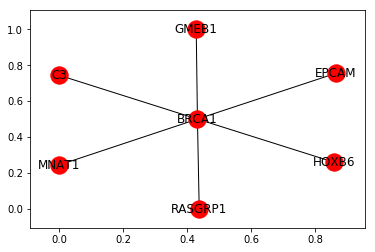

In [100]:
# q.gene_vis_promotes('BRCA1')
gene_id = 'BRCA1'
%matplotlib inline
import networkx as nx
n = 5
G = nx.Graph()
base = gene_id
nodes = [gene_id]
count = 0
p = q.gene_represses(gene_id)
# if p is None:
#     return
for node in p:
    nodes.append(node['gene'])
    if count >= n:
        break
    count += 1
G.add_nodes_from(nodes)
for node in nodes:
    G.add_edge(base, node)
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True)
plt.show()
# gene_id = 'BRCA1'
# p = q.gene_promotes(gene_id)
# p

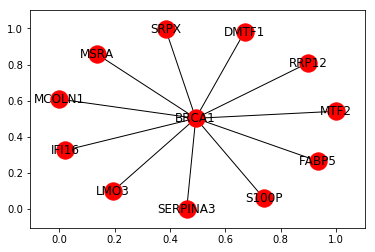

In [83]:
%matplotlib inline
import networkx as nx
n = 10
G = nx.Graph()
base = gene_id
G.add_node(base)
nodes = [base]
count = 0
for node in p:
    nodes.append(node['gene'])
    if count >= n:
        break
    count += 1
G.add_nodes_from(nodes)
for node in nodes:
    G.add_edge(base, node)
plot_nodes = G.nodes()
plot_edges = G.edges()
import matplotlib.pyplot as plt
nx.draw_networkx(G, with_labels=True)
plt.show()

In [40]:
10

10